# Activity 2.3 - CNN Network Architectures

#### Objective(s):

This activity aims to introduce how to use CNN network architectures

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use pretrained model in predicting the object
* Evaluate the accuracy of each pretrained model

#### Resources:
* Jupyter Notebook
* MNIST

#### Procedures
Load the necessary libraries

In [ ]:
# install opencv if you haven't
# pip install opencv-python
# pip install pillow

In [ ]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd

import cv2
from matplotlib.image import imread

import matplotlib.pyplot as plt


Create a function that will capture and save the image from your webcam

In [ ]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [ ]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10

        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

* Test your function.
* Place a clock or any object
* Display the saved image

In [ ]:
img_path = "basketball.png"

#if save_webcam_image(img_path) is False:
    # Webcam not active, use the Dog Image
    #img_path = "rocking_chair.jpg"
    #print("Using the Test Rocking Chair Image: {}".format(img_path))

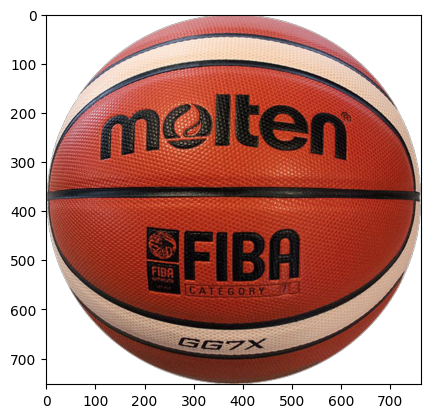

In [ ]:
plt.imshow(imread(img_path))

Use VGG-16 pre-trained model

In [ ]:
from keras.applications import vgg16


vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Create a function to load model, image, preprocess input and targets

In [ ]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(299, 299)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)

    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

Predict the result

In [ ]:
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 [==============================] - 1s 800ms/step


,Predicted Class,Name,Probability
0,n02802426,basketball,0.986705
1,n02877765,bottlecap,0.004194
2,n04019541,puck,0.003608
3,n04118538,rugby_ball,0.002315
4,n04540053,volleyball,0.001414
5,n02823428,beer_bottle,0.000623
6,n04409515,tennis_ball,0.000218
7,n04023962,punching_bag,0.000190
8,n03983396,pop_bottle,0.000171
9,n02795169,barrel,0.000147


Interpret the result of prediction using VGG16 model

#The model was able to accurately predict the basketball with 98.67% accuracy.

Use Resnet50 pretrained model

In [ ]:
from keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights='imagenet')

resnet50_model.summary()

102967424/102967424 [==============================] - 2s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                    

Predict the result

In [ ]:
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 [==============================] - 0s 229ms/step


,Predicted Class,Name,Probability
0,n02802426,basketball,9.999999e-01
1,n04118538,rugby_ball,1.403499e-07
2,n04023962,punching_bag,4.212160e-10
3,n04019541,puck,1.391852e-11
4,n03662601,lifeboat,7.489740e-12
5,n04409515,tennis_ball,2.971931e-12
6,n04540053,volleyball,2.512556e-12
7,n03379051,football_helmet,2.083661e-12
8,n02799071,baseball,1.252411e-12
9,n03970156,plunger,1.018422e-12


Interpret the result using RESNET50 pretrained model

#The model was able to predict the basketball with 99.99% accuracy.

#### Supplementary Activity

* Use at least three pretrained model and predict the result using the saved image.
* Compare their accuracy results.

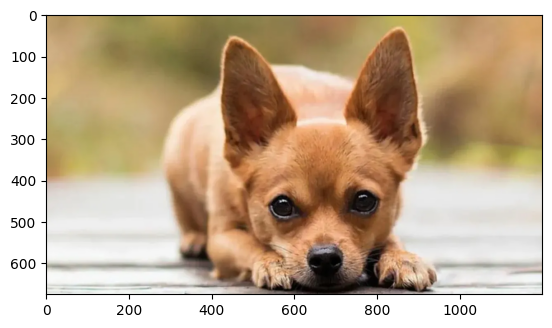

In [ ]:
supple_img = 'chihuahua.png'

plt.imshow(imread(supple_img))

In [ ]:
from keras.applications import xception

xception_model = xception.Xception(weights='imagenet')

xception_model.summary()

91884032/91884032 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_4[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activat

In [ ]:
predict_image(xception_model, supple_img, xception.preprocess_input, xception.decode_predictions)

1/1 [==============================] - 1s 740ms/step


,Predicted Class,Name,Probability
0,n02085620,Chihuahua,0.487973
1,n02094258,Norwich_terrier,0.029356
2,n02113023,Pembroke,0.022668
3,n02115641,dingo,0.022565
4,n02087046,toy_terrier,0.021673
5,n02113186,Cardigan,0.009554
6,n02110806,basenji,0.009170
7,n02106662,German_shepherd,0.006622
8,n02107312,miniature_pinscher,0.006147
9,n02105412,kelpie,0.005321


In [ ]:
from keras.applications import mobilenet

mobilenet_model = mobilenet.MobileNet(weights='imagenet')

mobilenet_model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                 

In [ ]:
predict_image(mobilenet_model, supple_img, mobilenet.preprocess_input, mobilenet.decode_predictions, (224,224))

1/1 [==============================] - 0s 103ms/step


,Predicted Class,Name,Probability
0,n02085620,Chihuahua,0.948250
1,n02113023,Pembroke,0.032421
2,n02113186,Cardigan,0.011471
3,n02087046,toy_terrier,0.003914
4,n02115641,dingo,0.001414
5,n02107312,miniature_pinscher,0.001164
6,n02110806,basenji,0.001080
7,n02086910,papillon,0.000064
8,n02105412,kelpie,0.000031
9,n02094258,Norwich_terrier,0.000030


In [ ]:
from keras.applications import vgg19

vgg19_model = vgg19.VGG19(weights='imagenet')

vgg19_model.summary()

574710816/574710816 [==============================] - 7s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
predict_image(vgg19_model, supple_img, vgg19.preprocess_input, vgg19.decode_predictions, (224,224))

1/1 [==============================] - 1s 1s/step


,Predicted Class,Name,Probability
0,n02113023,Pembroke,0.503723
1,n02113186,Cardigan,0.155770
2,n02115641,dingo,0.083956
3,n02085620,Chihuahua,0.069605
4,n02105412,kelpie,0.033395
5,n02087046,toy_terrier,0.032132
6,n02106662,German_shepherd,0.023395
7,n02110806,basenji,0.015297
8,n04409515,tennis_ball,0.011829
9,n02094258,Norwich_terrier,0.011454


# MobileNet was the most accurate in predicting the chihuahua while VGG19 was the least accurate.

#### Conclusion

#In this laboratory activity, we learned about the different CNN Network Architectures. The CNN architectures used are VGG16, ResNet50, Xception, MobileNet, and VGG19, which differ in their structure and complexity in handling image classification or object detection. For the supplementary activity, we tried out different pretrained models to see which is more accurate. It is interesting to see how each model differ in determining or predicting the image. All in all, CNN architectures play an important role in image classification and choosing the right one is dependent on the specific needs of the task.